<a href="https://colab.research.google.com/github/Rbca0/Data-Science/blob/main/UNIT4/RebeVanbU4Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Who is good at catching the ball after the people shoot it?**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import graphviz as gv
import pymc as pm

Basketball is a game where you can shoot the ball into the net from far away and get more points. Some ppl are better at it than others (NBA players are generally very good), but I think some types of NBA players will be even better than others and have a higher 3pt shooting percentage.

In [2]:
#load the data from my github page.
#nba stands for national basketball asocaition
url_nba = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
#I could have put the url string directly into pd.read_csv()
nba_data = pd.read_csv(url_nba)

In [3]:
#print a the begining and end of the raw data set, as a pandas dataframe
nba_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [4]:
nba_data = nba_data.dropna()

I am interested in position and 3pt percentage only

In [5]:
dag_nba = gv.Digraph(comment='nba_dag') #nba for national basketball asociation

dag_nba.node('P', 'Player Postition')
dag_nba.node('r','Total Rebounds')
dag_nba.edges(['Pr'])

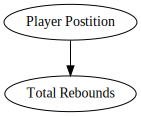

In [6]:
dag_nba

I think a player's position affects their 3pt percentage.

In [7]:
#identifies all the different amino acids in our data set
#and stores that information, plus original info, in the variable aa_encode
pos_encode = pd.Categorical(nba_data['Pos'])
pos_encode
##gaeni helped me spelel

['PF-C', 'C', 'SG', 'PF', 'SG', ..., 'PG', 'PF', 'PG', 'C', 'C']
Length: 514
Categories (12, object): ['C', 'C-PF', 'PF', 'PF-C', ..., 'SF-PF', 'SF-SG', 'SG', 'SG-PG']

In [8]:
#Replaces all the pos names with a number in the variable pos_idx
pos_idx = pos_encode.codes
pos_idx

array([ 3,  0, 10,  2, 10, 10,  0,  7,  5,  2,  2,  2,  5,  7,  7,  0,  0,
        5,  7,  5,  0,  2, 10,  5,  2,  2, 10, 10,  0,  7,  7,  2,  2, 10,
       10,  7, 10,  2,  5,  7,  0, 10,  5,  7,  7, 10,  8,  2,  0,  5,  7,
        2, 10,  5, 10,  7,  7,  7,  5,  5,  7,  6,  2,  7, 10,  2,  7,  5,
        0, 10,  7, 10, 10,  2,  2, 10,  2,  0,  5,  0, 10, 10,  7,  7, 10,
        7,  2, 10,  0,  2,  7,  2,  0,  5,  7,  7, 10,  8,  7,  2,  5, 10,
        5,  5,  0, 10, 10, 10,  7,  2, 10,  2,  5, 10,  5,  7, 10,  5,  7,
        0,  7, 10,  5,  2,  0,  2, 10,  7, 10,  0,  0,  7,  5,  0,  2,  5,
        7,  5, 10, 10,  5,  5,  7,  5,  2,  4,  5,  2,  0,  5,  2,  2, 10,
        0,  5,  2,  5,  5,  0,  5,  2, 10,  5,  2, 10,  2, 10,  7,  2, 10,
        7, 10,  2,  2,  2,  5,  5,  5,  7,  5, 10, 10, 10,  2,  7,  0,  7,
       10,  0,  5,  7,  5,  2, 10,  9,  2, 10, 10,  5,  5, 10,  1,  0, 10,
        0,  5,  7,  7,  7, 10,  0,  7,  2,  5,  7,  7, 10,  2, 10, 10,  2,
        0,  0,  5,  2,  2

In [9]:
#stores the category names in a dictionary
#this dictionary format is required for pymc to properly read the categories
pos_coords = {"pos": pos_encode.categories}
pos_coords

{'pos': Index(['C', 'C-PF', 'PF', 'PF-C', 'PF-SF', 'PG', 'PG-SG', 'SF', 'SF-PF',
        'SF-SG', 'SG', 'SG-PG'],
       dtype='object')}

I'm going to look at the data to find out what distribution I should use to model the 3 point percentages.

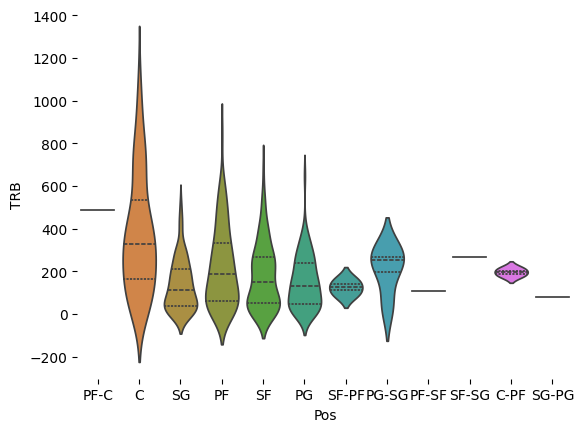

In [10]:
sns.violinplot(nba_data, x='Pos', y='TRB', inner='quart',hue='Pos')
sns.despine(top=True, right=True, bottom=True, left=True) #removes border box in plot

Because these look vaguely normal (they are symmetrical and have tiny tails), I'm going to try a normal distribution

In [ ]:
with pm.Model(coords=pos_coords) as nba_nh_model:

    μ = pm.Normal('μ', mu=300, sigma=100, dims="pos")

    σ = pm.HalfNormal('σ', sigma=100, dims="pos")

    y = pm.Normal('gs',
                  mu = μ[pos_idx],
                  sigma = σ[pos_idx],
                  observed=nba_data.TRB.values)

    #cs for chemshift, nh for nonheirarchical
    idata_nba_nh = pm.sample()
    idata_nba_nh = pm. sample(target_accept = .99)



In [ ]:
##posterior predictive check
pm.sample_posterior_predictive(idata_nba_nh, model=nba_nh_model, extend_inferencedata=True)
##gemeni autocorrected

Output()

<Axes: xlabel='gs'>

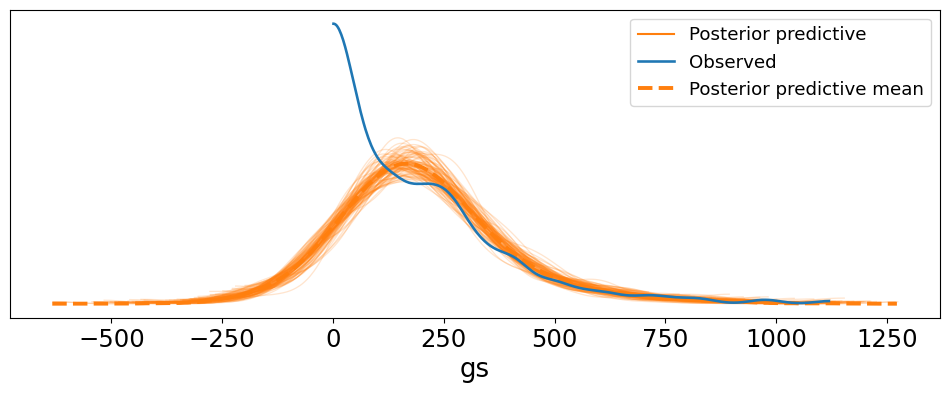

In [62]:
pm.sample_posterior_predictive(idata_nba_nh, model=nba_nh_model, extend_inferencedata=True)
az.plot_ppc(idata_nba_nh, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Oh no, this is a bad model. It doesn't follow the curve. I should try half of this (half normal)


In [ ]:
with pm.Model(coords=pos_coords) as nba_nh_hn_model:

    σ = pm.HalfNormal('σ', sigma=100, dims="pos")

    y = pm.HalfNormal('gs',
                  sigma = σ[pos_idx],
                  observed=nba_data.TRB.values)

    #cs for chemshift, nh for nonheirarchical
    idata_nba_nh_hn = pm. sample(target_accept = .99)

In [ ]:
pm.sample_posterior_predictive(idata_nba_nh_hn, model=nba_nh_hn_model, extend_inferencedata=True)
az.plot_ppc(idata_nba_nh_hn, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

this model is signifiantly better, but I may be able to do even better with an expontential model.

In [ ]:
with pm.Model(coords=pos_coords) as nba_nh_ex_model:

    # Change to lam and ensure it's positive, e.g., with HalfNormal
    lam = pm.HalfNormal('lam', sigma=100, dims="pos") # Changed from λ and Normal to lam and HalfNormal

    y = pm.Exponential('gs',
                  lam = lam[pos_idx], # Changed λ to lam
                  observed=nba_data.TRB.values)

    #cs for chemshift, nh for nonheirarchical
    idata_nba_nh_ex = pm.sample()
    idata_nba_nh_ex = pm. sample(target_accept = .99)

In [ ]:
pm.sample_posterior_predictive(idata_nba_nh_ex, model=nba_nh_ex_model, extend_inferencedata=True)

(0.0, 700.0)

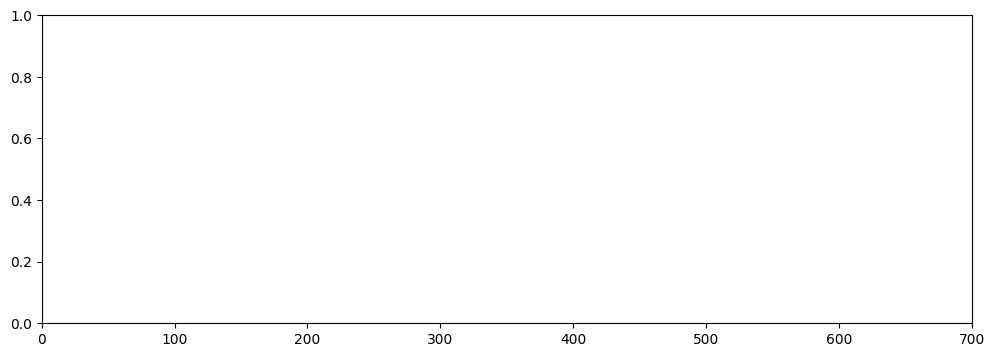

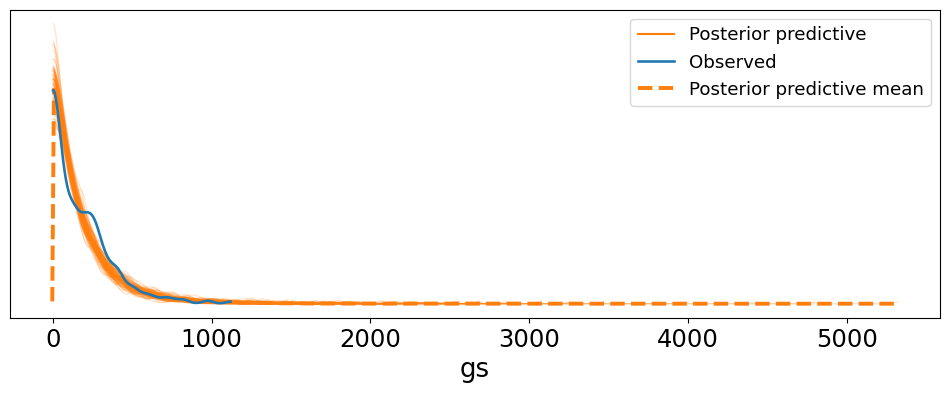

In [18]:
_, ax = plt.subplots(figsize=(12, 4))
##gmeemgni and mr arredodndo trying to change size of plot. come back to this?
az.plot_ppc(idata_nba_nh_ex, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(0,700)

This is the best! I'm going to try to make a hierarchical model now. after making my forest plot

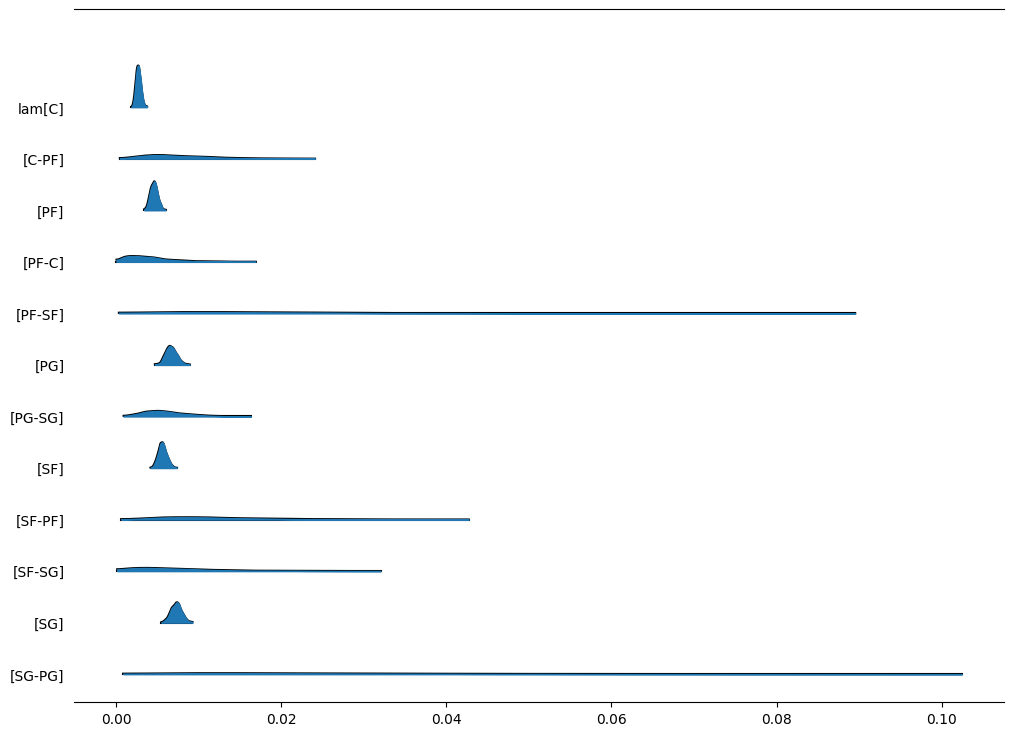

In [19]:
axes = az.plot_forest(idata_nba_nh_ex, kind="ridgeplot",
                      var_names='lam',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

I don't know what Lam does, apparently it is 1/mean. I'm going to make a forest plot of my halfnormal model and assume the means are relatively close.

In [ ]:
idata_nba_nh_hn

array([<Axes: >], dtype=object)

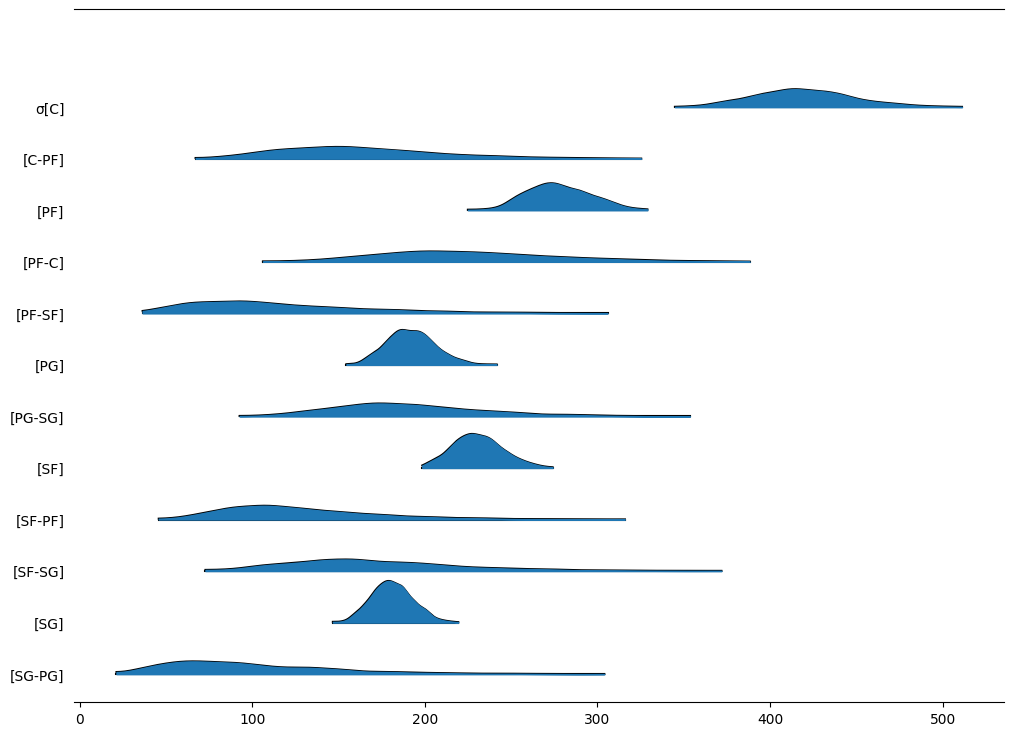

In [21]:
az.plot_forest(idata_nba_nh_hn, var_names=['σ'], combined=True, figsize=(12, 9), kind = 'ridgeplot', hdi_prob=0.997)

seeing all the different positions makes me wonder if they affect each other. . . . I should try a hierarchical model.

In [ ]:
with pm.Model(coords=pos_coords) as nba_h_model:
    # hyperpriors. Notice how there's no dims argument.
    #this means that the hyperprior is shared across all nba positions
    λ_lam = pm.Normal('λ_lam', mu = 300, sigma = 200)



    λ = pm.HalfNormal('λ', sigma=100, dims="pos") # Changed from λ and Normal to lam and HalfNormal

    #likelihood; same as before
    y = pm.Exponential('y',
                  lam = λ[pos_idx], #I include the prior in my likelihood
                  observed = nba_data.TRB)

    #cs for chemshift, h for heirarchical
    idata_nba_h = pm.sample(target_accept = .99)

In [ ]:
pm.sample_posterior_predictive(idata_nba_h, model=nba_h_model, extend_inferencedata=True)

<Axes: xlabel='y'>

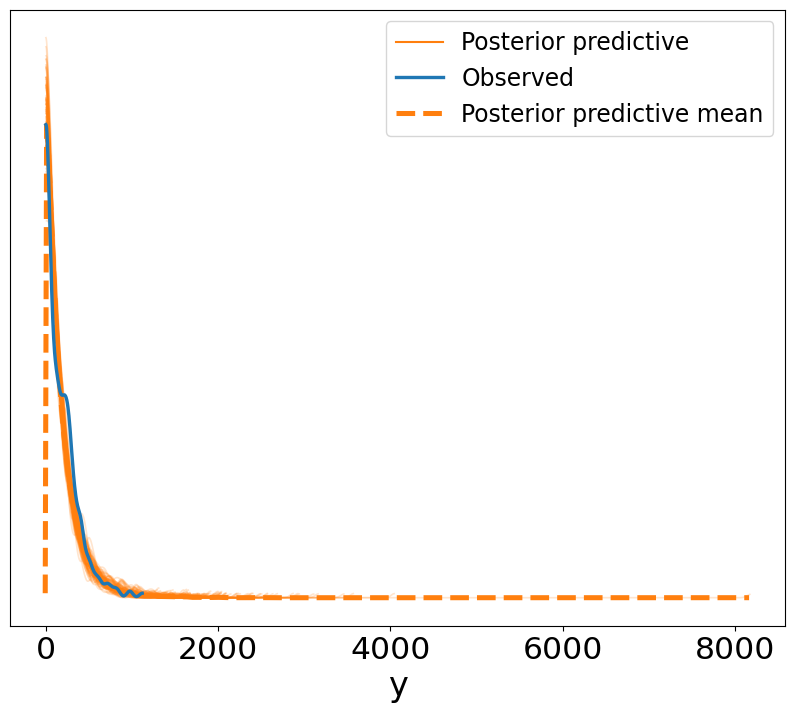

In [28]:
az.plot_ppc(idata_nba_h, num_pp_samples=100, figsize=(10, 8), colors=["C1", "C0", "C1"])

Wow this model is so good! I think it is slightly better than the non-hirerarchical model, it follows the curve better.  

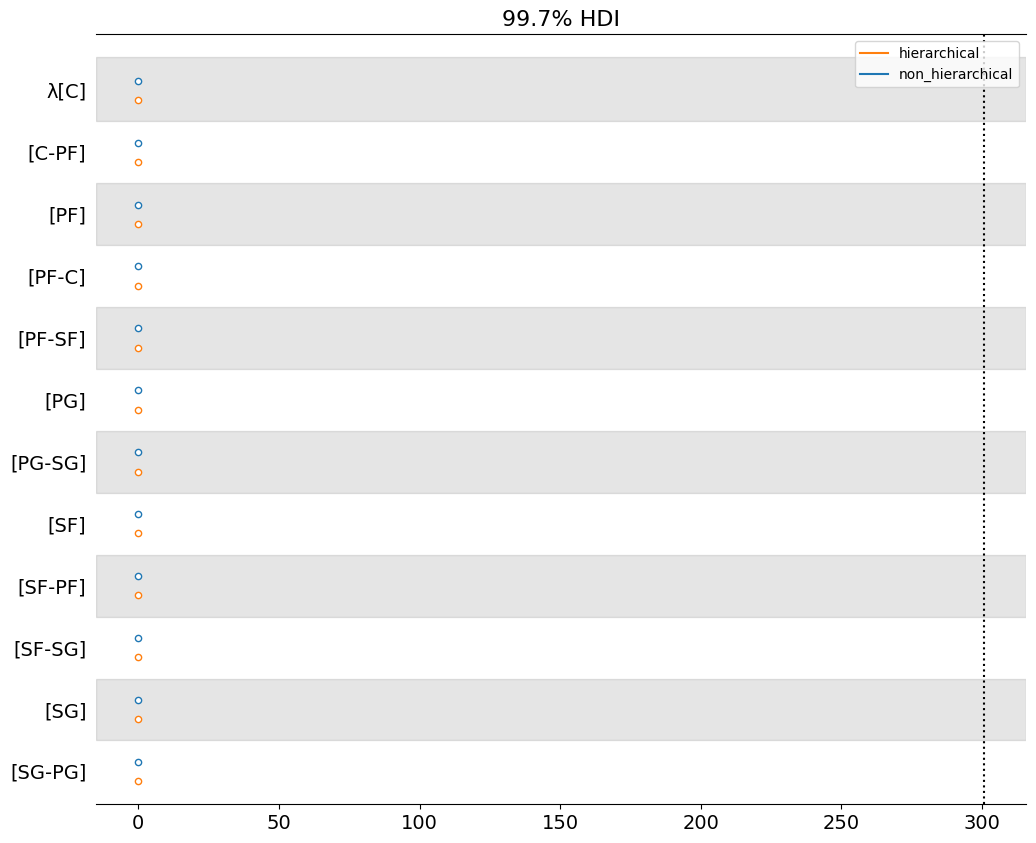

In [31]:
#plots a 99.7% hdi for the posteriors of both models on the same plot
axes = az.plot_forest([idata_nba_h, idata_nba_h], kind="forestplot",
                      model_names=['non_hierarchical', 'hierarchical'],
                      var_names='λ', combined=True, figsize=(12, 10),hdi_prob=0.997)

#plots overall mean of the hierarchical model; do not confuse with 0
y_lims = axes[0].get_ylim()
axes[0].vlines(idata_nba_h.posterior['λ_lam'].mean(), *y_lims, color="k", ls=":");

I don't know what this means, though I am plotting lambda which is less helpful.

array([<Axes: >], dtype=object)

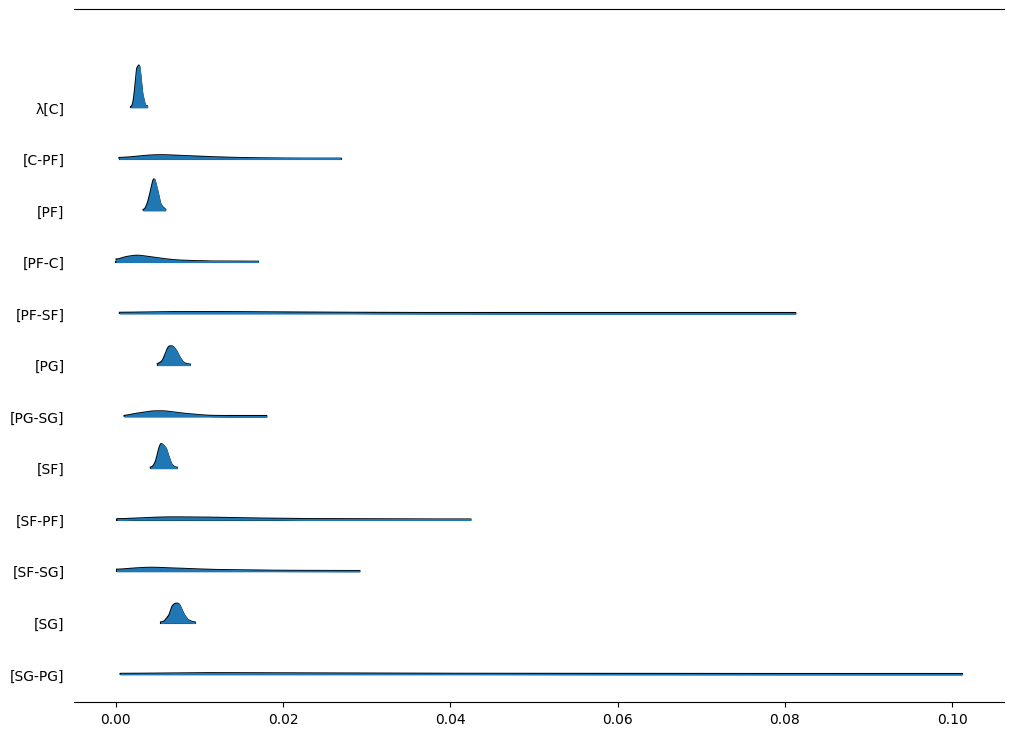

In [33]:
az.plot_forest(idata_nba_h, var_names=['λ'], combined=True, figsize=(12, 9), kind = 'ridgeplot', hdi_prob=0.997)

array([[<Axes: title={'center': 'λ\nC'}>,
        <Axes: title={'center': 'λ\nC-PF'}>,
        <Axes: title={'center': 'λ\nPF'}>,
        <Axes: title={'center': 'λ\nPF-C'}>],
       [<Axes: title={'center': 'λ\nPF-SF'}>,
        <Axes: title={'center': 'λ\nPG'}>,
        <Axes: title={'center': 'λ\nPG-SG'}>,
        <Axes: title={'center': 'λ\nSF'}>],
       [<Axes: title={'center': 'λ\nSF-PF'}>,
        <Axes: title={'center': 'λ\nSF-SG'}>,
        <Axes: title={'center': 'λ\nSG'}>,
        <Axes: title={'center': 'λ\nSG-PG'}>],
       [<Axes: title={'center': 'λ_lam'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

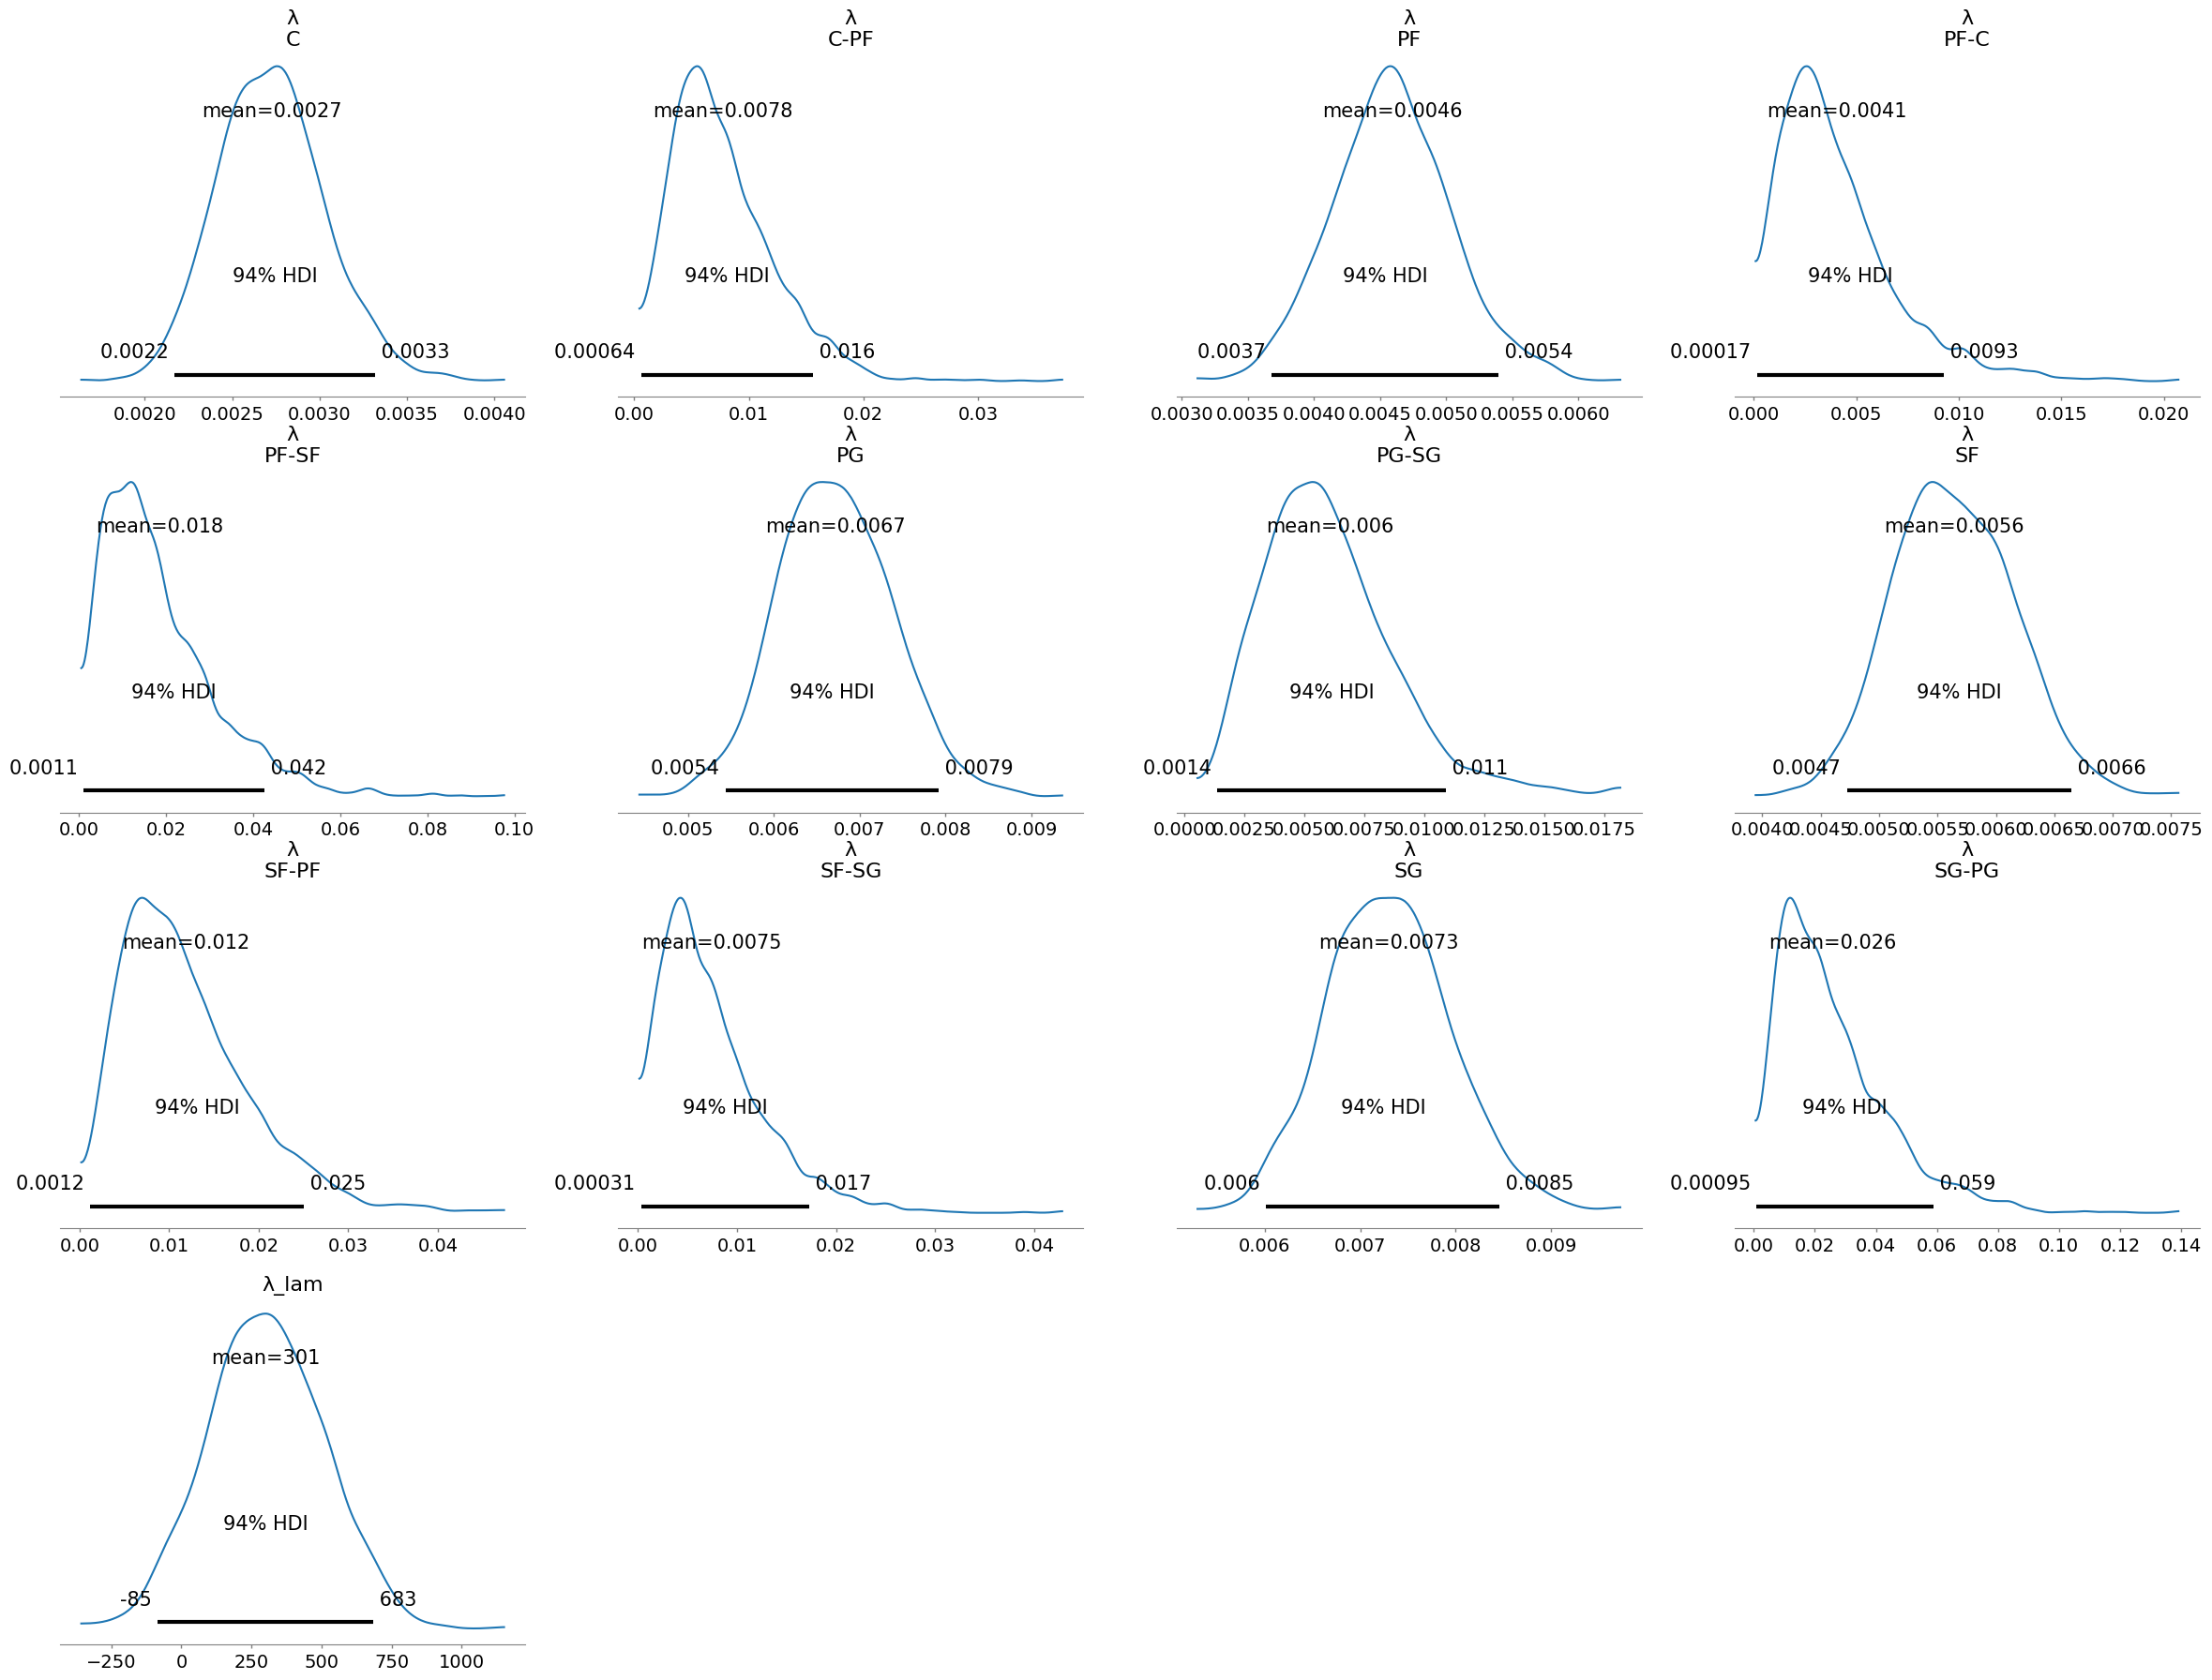

In [35]:
az.plot_posterior(idata_nba_h)

These are plots of the lambdas, which are 1/mew. I will convert them into mew to find the means per position.

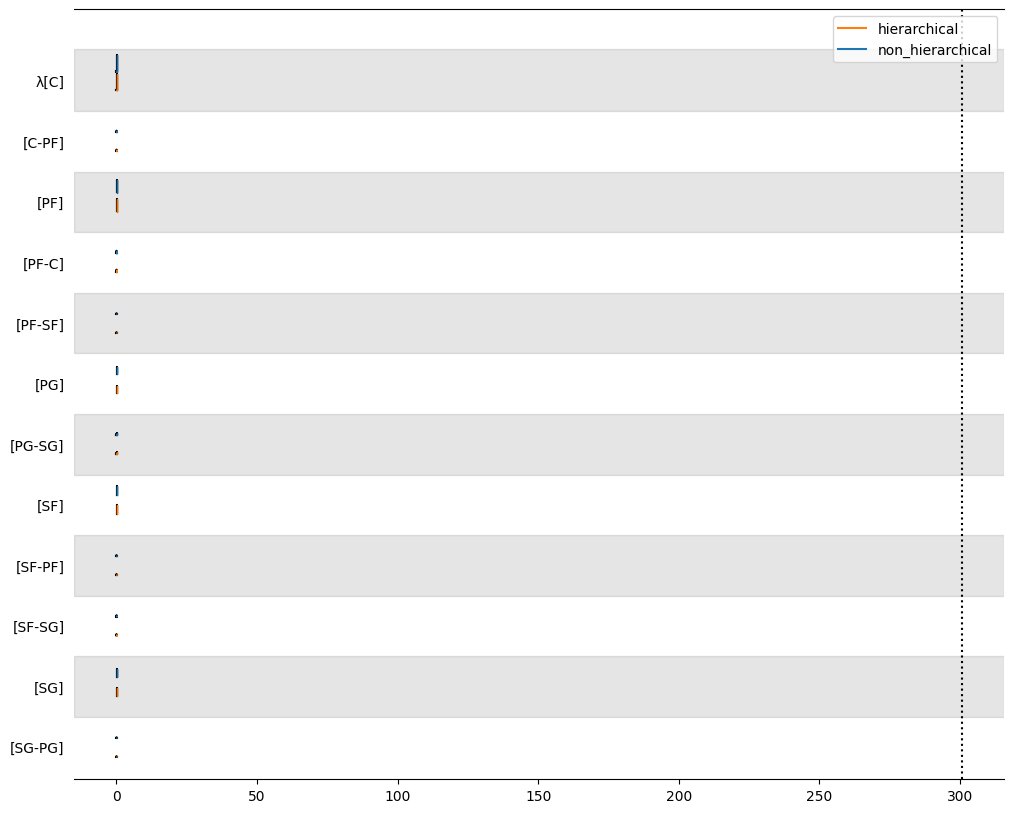

In [61]:
#plots a 99.7% hdi for the posteriors of both models on the same plot
axes = az.plot_forest([idata_nba_h, idata_nba_h], kind="ridgeplot",
                      model_names=['non_hierarchical', 'hierarchical'],
                      var_names='λ', combined=True, figsize=(12, 10),hdi_prob=0.997)

#plots overall mean of the hierarchical model; do not confuse with 0
y_lims = axes[0].get_ylim()
axes[0].vlines(idata_nba_h.posterior['λ_lam'].mean(), *y_lims, color="k", ls=":");

It's hard to see the differences btween the models here because they are slight, but I will plot 1/lamba for the non hierarchical model to figuer out its means.

In [58]:
1/.0027
##mew for centers

370.3703703703703

In [45]:
1/.0078
##mew for center power forwards

128.2051282051282

In [46]:
1/.0046
##power forwaeds

217.3913043478261

In [47]:
1/.0041
##power forward centers

243.90243902439022

In [49]:
1/.018
##power forward-small forward

55.55555555555556

In [50]:
1/.0067
##mew for point guards

149.2537313432836

In [51]:
1/.006
##point guard shooting guard

166.66666666666666

In [52]:
1/.0056
##small forward

178.57142857142858

In [53]:
1/.012
##small forawrd power forward

83.33333333333333

In [54]:
1/.0075
##mew for small forward shooting guard

133.33333333333334

In [57]:
1/.0073
##mew for shooting

136.986301369863

In [56]:
1/.026
##mew for shooting guard point guard

38.46153846153846

Here are the mews for the total rebounds for the hierarchical model by position!

### In conclusion, centers are the best at catching the ball after people shoot it. This makes sense, as they are generally the tallest players on the court and they are closest to the basket when people shoot the ball, which means they are doubly close to the ball so they can get it faster.

I know this because of both my hierarchical and non-hierarchical model, but I trust my hierarchical model slightly more because it had a better posterior predictive check AKA the mean line followed the data better.